In [1]:
import os
os.chdir('/workspaces/kornia/')
print(os.getcwd())

/workspaces/kornia


In [2]:
import matplotlib.pyplot as plt
import torch

from kornia.geometry.nerf.rays import RandomRaySampler, UniformRaySampler
from test.geometry.nerf.test_rays import create_camera_dimensions

In [3]:
heights, widths, num_rays = create_camera_dimensions('cpu', int)
heights = torch.div(heights, 10).int()
widths = torch.div(widths, 10).int()
print(heights, widths, num_rays)

sampler = RandomRaySampler(1, 1, 1)
points_2d_camera = sampler.sample_points_2d(heights, widths, num_rays)

tensor([20, 20, 20, 10, 10], dtype=torch.int32) tensor([30, 30, 30, 40, 40], dtype=torch.int32) tensor([10, 10, 10, 15, 15])


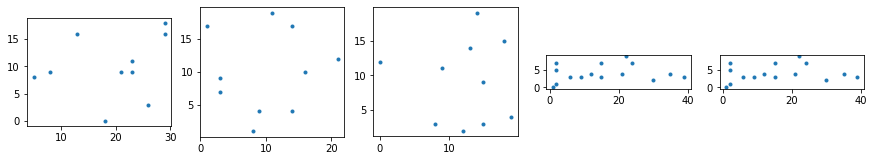

In [4]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(151)
plt.plot(points_2d_camera[10].points_2d[0, :, 0], points_2d_camera[10].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(152)
plt.plot(points_2d_camera[10].points_2d[1, :, 0], points_2d_camera[10].points_2d[1, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(153)
plt.plot(points_2d_camera[10].points_2d[2, :, 0], points_2d_camera[10].points_2d[2, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(154)
plt.plot(points_2d_camera[15].points_2d[0, :, 0], points_2d_camera[15].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(155)
plt.plot(points_2d_camera[15].points_2d[0, :, 0], points_2d_camera[15].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

In [5]:
uniform_sampler = UniformRaySampler(1, 1, 1)
points_2d_camera = uniform_sampler.sample_points_2d(heights, widths)

/usr/local/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


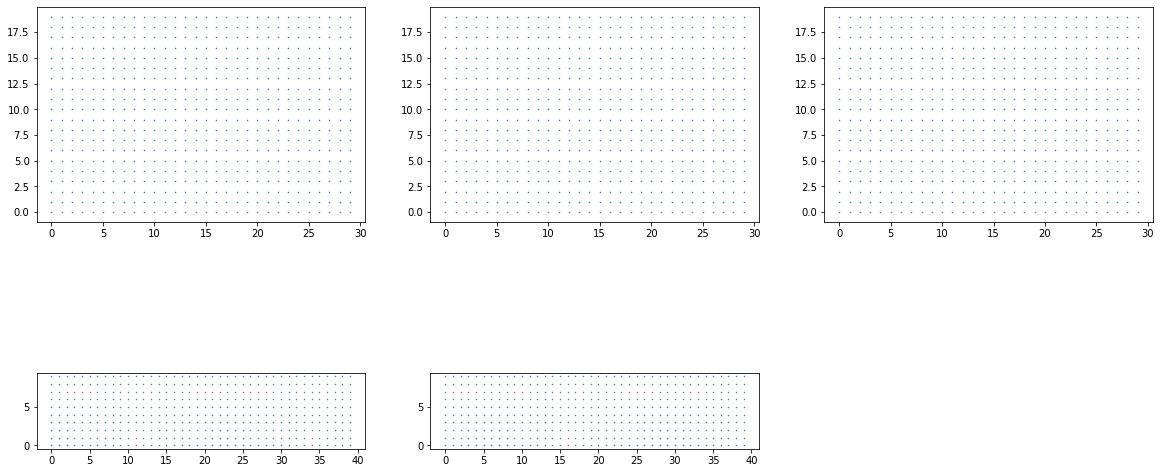

In [6]:
plt.figure(figsize=(20, 10))

ax = plt.subplot(231)
plt.plot(points_2d_camera[600].points_2d[0, :, 0], points_2d_camera[600].points_2d[0, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(232)
plt.plot(points_2d_camera[600].points_2d[1, :, 0], points_2d_camera[600].points_2d[1, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(233)
plt.plot(points_2d_camera[600].points_2d[2, :, 0], points_2d_camera[600].points_2d[2, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(234)
plt.plot(points_2d_camera[400].points_2d[0, :, 0], points_2d_camera[400].points_2d[0, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(235)
plt.plot(points_2d_camera[400].points_2d[1, :, 0], points_2d_camera[400].points_2d[1, :, 1], '.', markersize=1)
ax.set_aspect('equal')